In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95% !important;}</style>"))

In [85]:
import matplotlib as plt

In [1]:
from shapely.geometry import Point
point = Point(0.0, 0.0)
q = Point((0.0, 0.0))

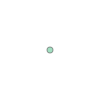

In [3]:
q

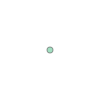

In [8]:
q

In [3]:
from shapely.geometry import LineString
line = LineString([(0, 0), (1, 1)])

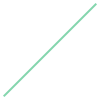

In [9]:
line

In [10]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (1, 1), (1, 0)])

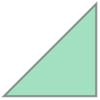

In [12]:
polygon

In [17]:
import geopandas as gpd
solar_farms = gpd.read_file('Solar_farm_sample.geojson', driver = 'GeoJSON')
solar_farms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
solar_farms_eov = solar_farms.to_crs(23700)
solar_farms_eov.crs

<Projected CRS: EPSG:23700>
Name: HD72 / EOV
Axis Info [cartesian]:
- Y[east]: Easting (metre)
- X[north]: Northing (metre)
Area of Use:
- name: Hungary
- bounds: (16.11, 45.74, 22.9, 48.58)
Coordinate Operation:
- name: Egyseges Orszagos Vetuleti
- method: Hotine Oblique Mercator (variant B)
Datum: Hungarian Datum 1972
- Ellipsoid: GRS 1967
- Prime Meridian: Greenwich

In [17]:
import osmnx as ox

place_name = 'Debrecen, Hungary'

place = ox.geocoder.geocode_to_gdf(place_name, which_result=None, by_osmid=False, buffer_dist=None)
place[['place_id', 'osm_type', 'osm_id', 'display_name', 'class', 'geometry']]

,place_id,osm_type,osm_id,display_name,class,geometry
0,282424244,relation,1444234,"Debrecen, Debreceni járás, Hajdú-Bihar, Great ...",boundary,"POLYGON ((21.43653 47.53555, 21.43806 47.53209..."


In [6]:
place

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((21.43653 47.53555, 21.43806 47.53209...",47.636982,47.425047,21.883308,21.436531,282424244,relation,1444234,47.531513,21.657209,"Debrecen, Debreceni járás, Hajdú-Bihar, Great ...",boundary,administrative,0.824475


<AxesSubplot:>

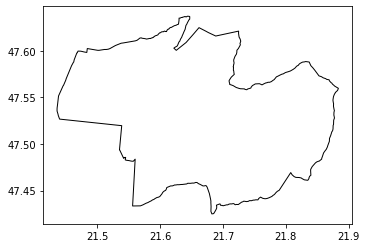

In [15]:
place.plot(facecolor='none', edgecolor='black')

In [16]:
place.to_file('Debrecen_polygon.geojson', driver = 'GeoJSON')

In [28]:
restaurant_cafe = ox.geometries.geometries_from_place(place_name,
                                                      tags = {'amenity':['restaurant','cafe']},
                                                      which_result=None, buffer_dist=None)

<AxesSubplot:>

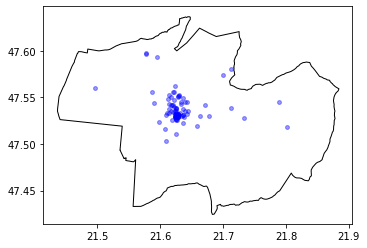

In [54]:
base = place.plot(facecolor='white', edgecolor='black')
restaurant_cafe.plot(ax=base, marker='o', color='blue', alpha=0.4, markersize=15)

In [32]:
restaurant_cafe.columns

Index(['unique_id', 'osmid', 'element_type', 'amenity', 'name', 'geometry',
       'wheelchair', 'addr:city', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'cuisine', 'contact:phone', 'contact:website', 'dog',
       'old_name', 'opening_hours', 'addr:country', 'toilets:wheelchair',
       'website', 'smoking', 'payment:bitcoin', 'shop', 'delivery', 'takeaway',
       'internet_access', 'outdoor_seating', 'phone', 'email', 'operator',
       'fixme', 'source', 'url', 'source:date', 'capacity', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'note', 'facebook', 'name:de',
       'name:en', 'free_refill', 'owncup', 'air_conditioning', 'diet:vegan',
       'opening_hours:covid19', 'nodes', 'building', 'alt_name', 'description',
       'payment:visa', 'diet:vegetarian'],
      dtype='object')

In [39]:
network_type = 'drive_service'
G = ox.graph.graph_from_place(place_name, network_type=network_type)

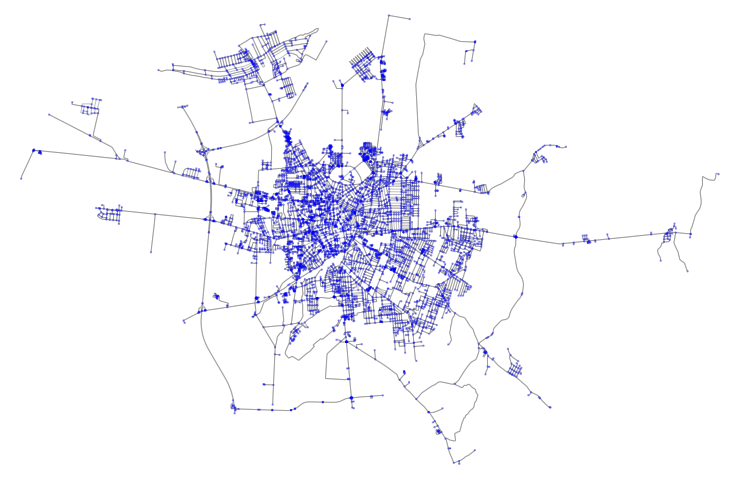

In [64]:
fig, ax = ox.plot_graph(G, figsize=(13, 13),
                        edge_color='grey', edge_alpha=0.5,
                        node_color='blue', node_alpha=0.4, node_size=5,
                        bgcolor='white')

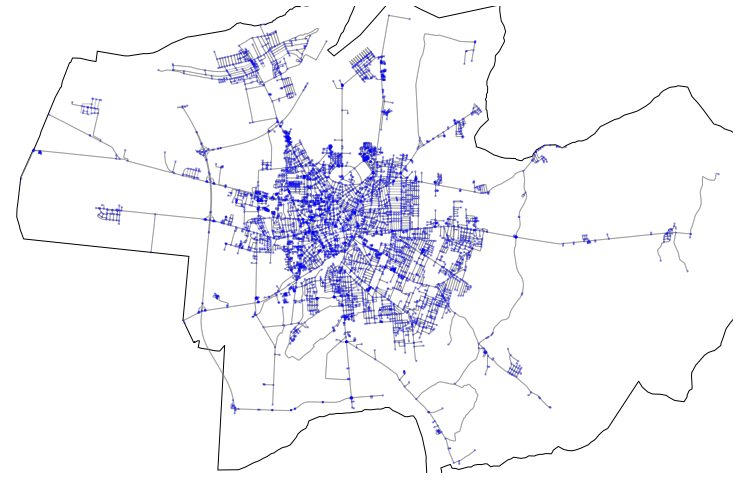

In [63]:
base = place.plot(figsize=(13,13), facecolor='white', edgecolor='black')
fig, ax = ox.plot_graph(G, base, figsize=(13, 13),
                        edge_color='grey', edge_alpha=0.5,
                        node_color='blue', node_alpha=0.4, node_size=5,
                        bgcolor='white')

In [69]:
nodes, edges = ox.utils_graph.graph_to_gdfs(G)

In [71]:
nodes.reset_index().head(2)

,osmid,y,x,street_count,highway,ref,geometry
0,26754845,47.600164,21.654297,3,NaN,NaN,POINT (21.65430 47.60016)
1,26754851,47.593544,21.639809,4,NaN,NaN,POINT (21.63981 47.59354)


In [72]:
edges.reset_index().head(2)

,u,v,key,osmid,ref,name,highway,oneway,length,geometry,lanes,maxspeed,junction,bridge,access,tunnel,width,service
0,26754845,5510290784,0,546889380,4,Külső Kassai út,primary,False,2.662,"LINESTRING (21.65430 47.60016, 21.65430 47.60019)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26754845,5751445710,0,606686041,NaN,Mezőgazdász utca,tertiary,False,130.130,"LINESTRING (21.65430 47.60016, 21.65259 47.59996)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

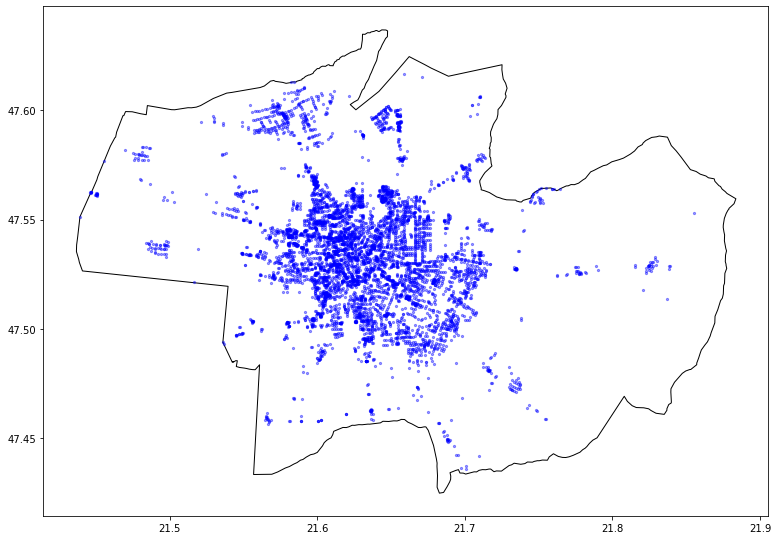

In [81]:
base = place.plot(figsize=(13, 13), facecolor='white', edgecolor='black')
nodes.plot(ax= base, figsize=(13, 13), marker='o', color='blue', alpha=0.4, markersize=5)

<AxesSubplot:>

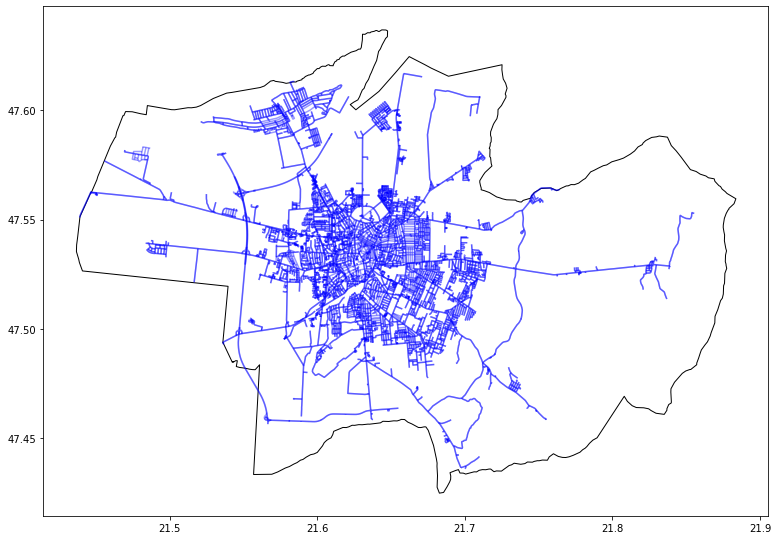

In [83]:
base = place.plot(figsize=(13, 13), facecolor='white', edgecolor='black')
edges.plot(ax= base, figsize=(13, 13), color='blue', alpha=0.4)

<AxesSubplot:>

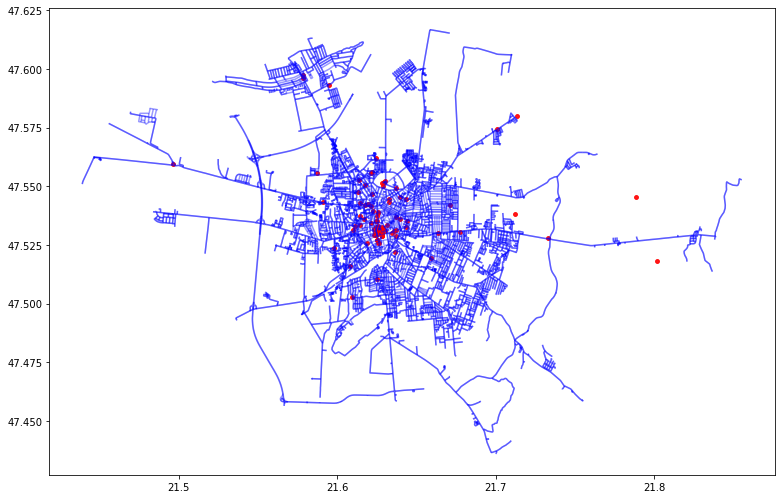

In [92]:
f, ax = plt.pyplot.subplots(1,1, figsize=(13,13))

edges.plot(ax=ax, figsize=(13, 13), color='blue', alpha=0.4)
restaurant_cafe.plot(ax=ax, marker='o', color='red', alpha=0.9, markersize=15)

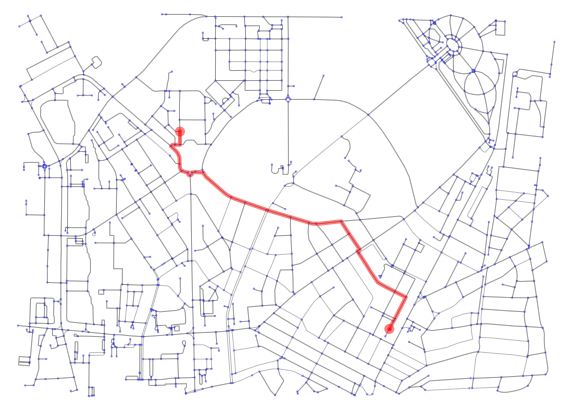

In [99]:
network_type = 'drive_service'
G = ox.graph.graph_from_bbox(north=47.56152, south=47.53757, east=21.6553, west=21.60566, network_type=network_type)

origin_coordinates = ox.geocode('Főépület, Egyetem, Debrecen,')
destination_coordinates = ox.geocode('Informatika Kar, Debrecen')

origin_node = ox.get_nearest_node(G, origin_coordinates)
destination_node = ox.get_nearest_node(G, destination_coordinates)

shortest_route_by_distance = ox.shortest_path(G, origin_node, destination_node, weight='length')

fig, ax = ox.plot_graph_route(G,  shortest_route_by_distance, figsize=(10, 10),
                        edge_color='grey', edge_alpha=0.5,
                        node_color='blue', node_alpha=0.4, node_size=5,
                        bgcolor='white')

In [104]:
shortest_route_by_distance

[266772771,
 266772770,
 1489128928,
 26754896,
 267373900,
 267374543,
 267374795,
 267374708,
 26754902,
 249781238,
 249780125,
 320767742,
 320767664,
 478735618,
 479309236,
 312629370,
 1399648524,
 1399648535,
 26754888,
 1399648522,
 247995169,
 2287951645,
 2287951639,
 1399545292,
 1399545291,
 1399545285,
 2287907867,
 2287907852]

In [111]:
import networkx as nx
test = nx.shortest_path_length(G, source=shortest_route_by_distance[0], target=shortest_route_by_distance[-1],  weight='length')

In [116]:
import networkx as nx
distance = nx.shortest_path_length(G,
                                   source=origin_node,
                                   target=destination_node,
                                   weight='length')
distance

2563.22

In [114]:
test

2563.22